Example notebook to recreate Fig. 7 (calibrated TFR corner plot) for the DR1 TF paper.

In [8]:
import numpy as np

from astropy.io import fits

from corner import corner

import matplotlib.pyplot as plt

# Data

In [2]:
hdul = fits.open('fig7_data.fits')

mcmc_samples = hdul[0].data

hdul.close()

# Plot

In [3]:
# Limits for each parameter in the corner plot

values = np.median(mcmc_samples, axis=1)
sigmas = np.std(mcmc_samples, axis=1)

multiple = 3.5

limits = []

for i in range(len(values)):
    limits.append([values[i] - multiple*sigmas[i], 
                   values[i] + multiple*sigmas[i]])

<Figure size 5000x5000 with 0 Axes>

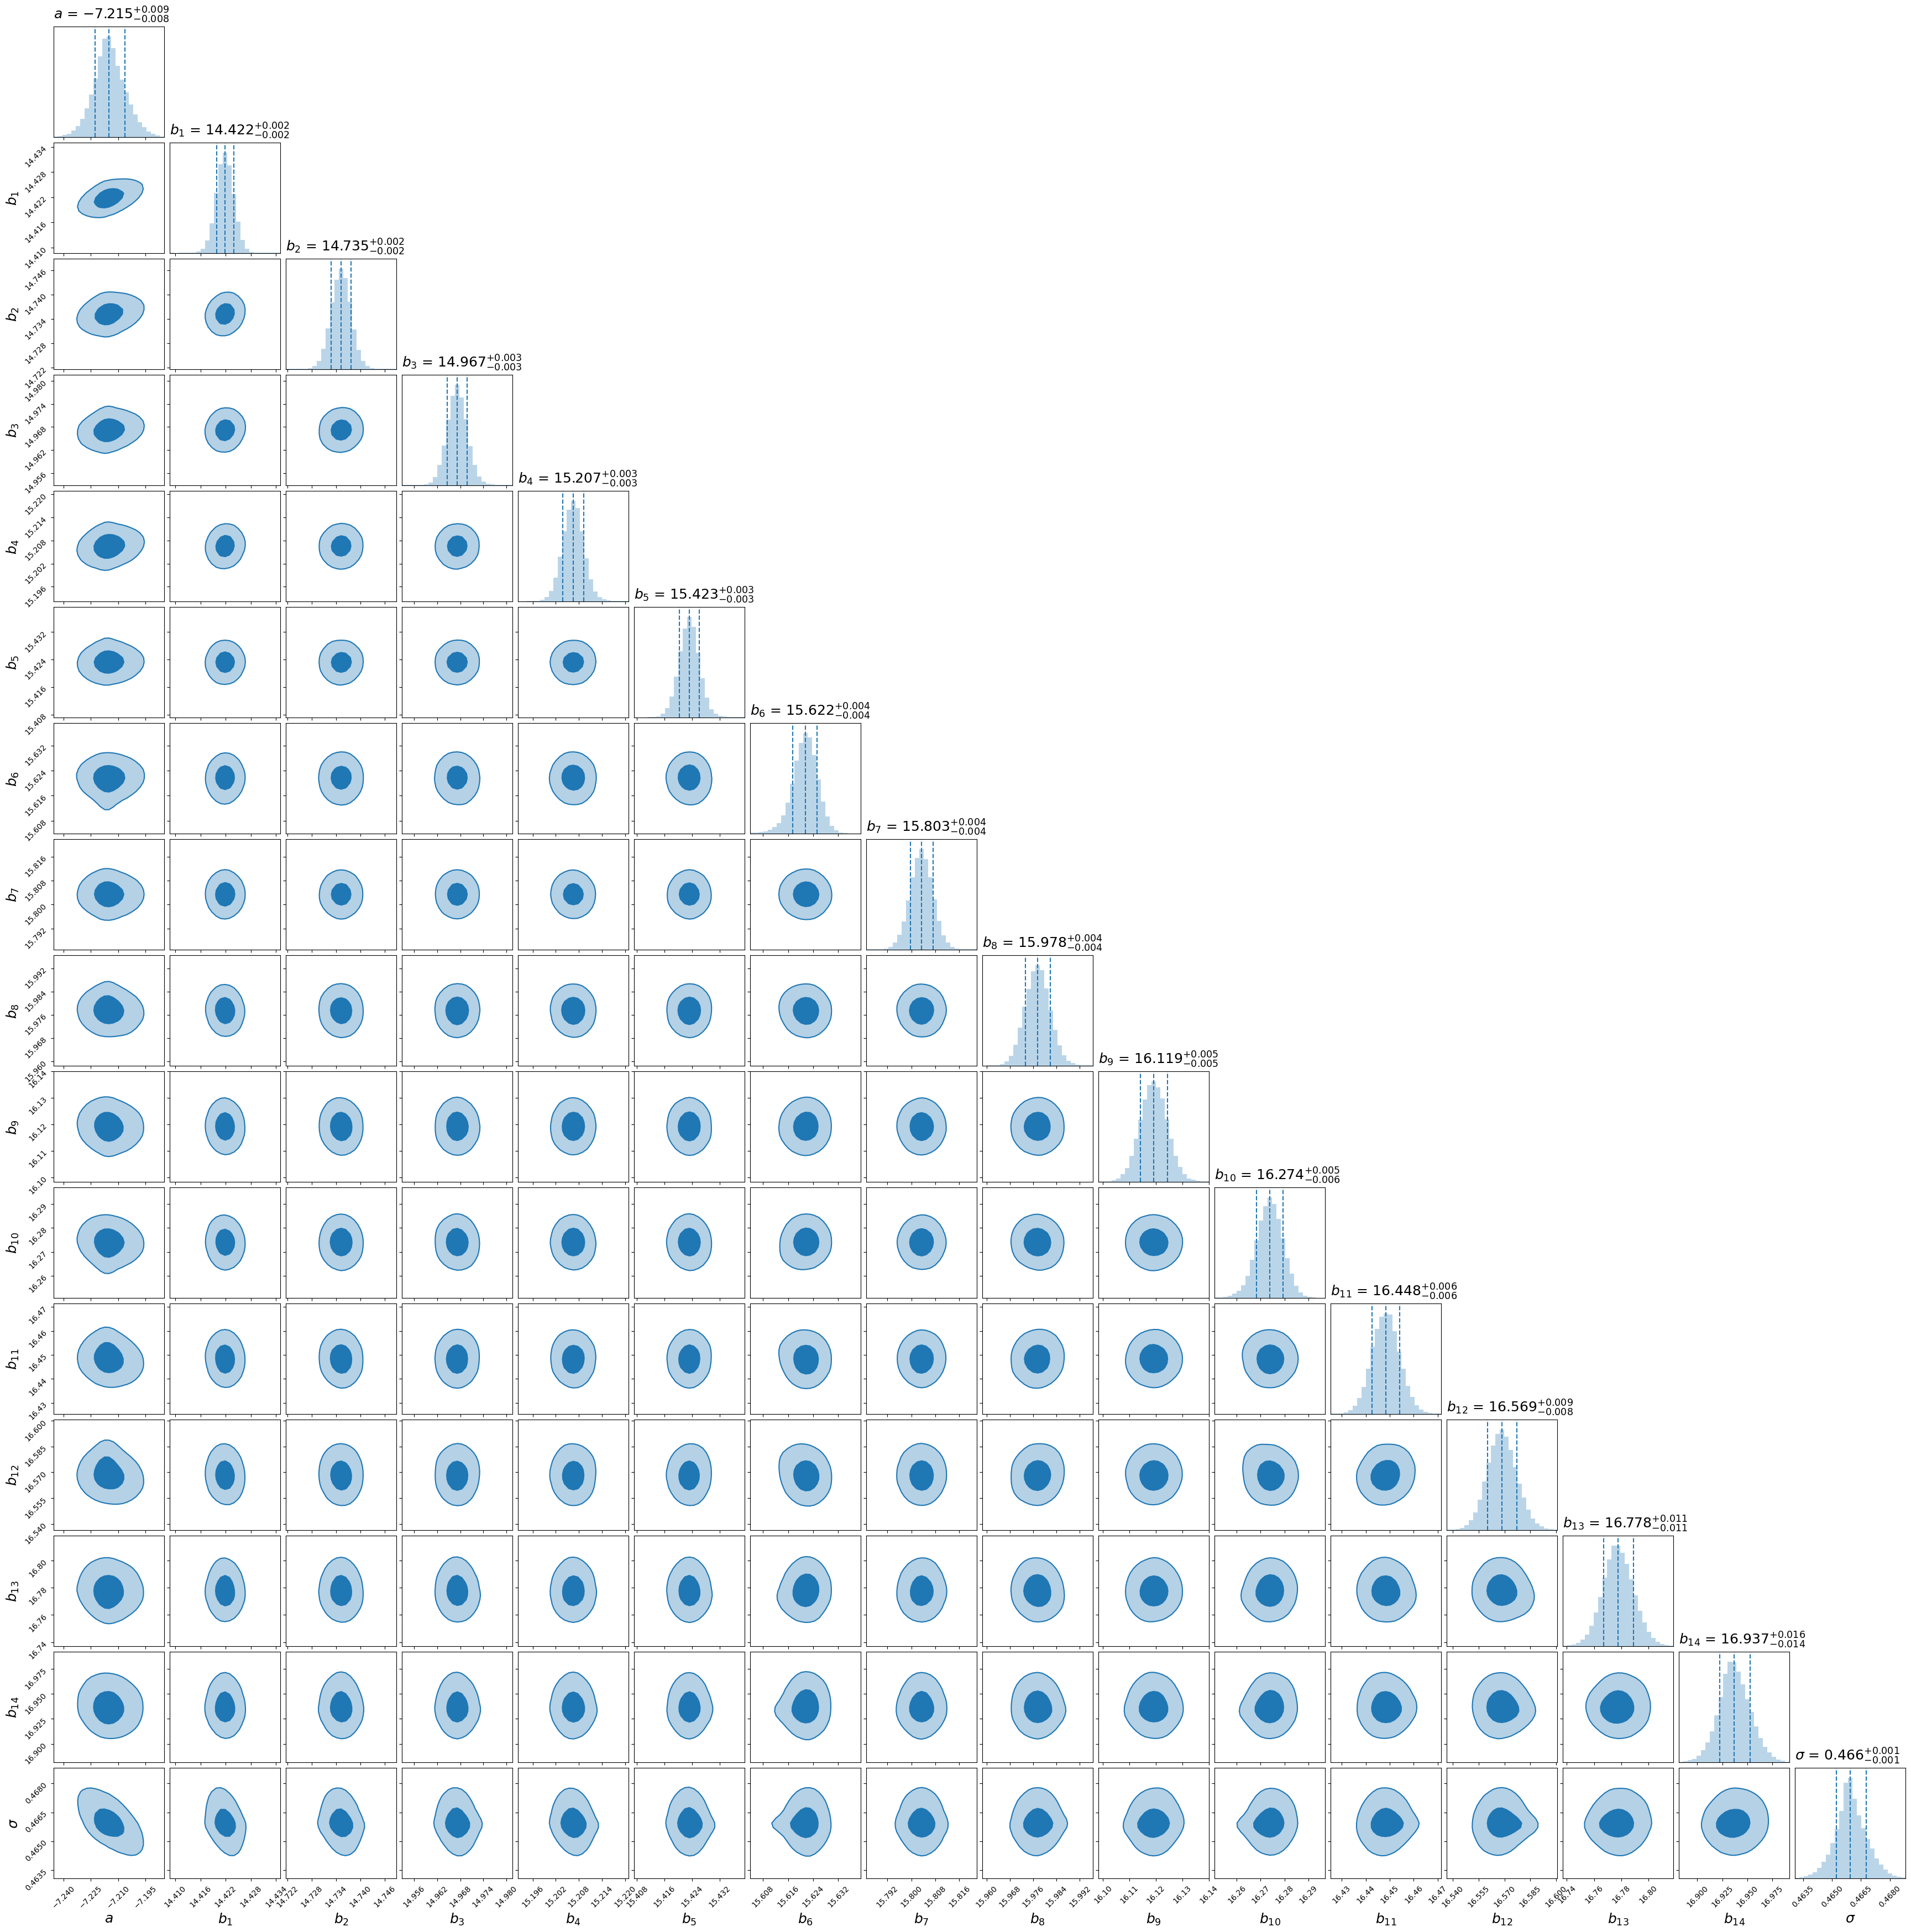

In [11]:
labels  = ['$a$']
labels += [f'$b_{{ {k+1} }}$' for k in np.arange(len(values)-2)]
labels += [r'$\sigma$']

fig = plt.figure(figsize=(50,50))

corner(mcmc_samples.T, bins=25, smooth=1, 
       range=limits, 
       labels=labels,
       label_kwargs={'fontsize':18},
       levels=(1-np.exp(-0.5), 1-np.exp(-2)),
       quantiles=[0.16, 0.5, 0.84],
       color='tab:blue',
       hist_kwargs={'histtype':'stepfilled', 'alpha':0.3},
       plot_datapoints=False,
       fill_contours=True,
       show_titles=True,
       title_fmt='.3f', 
       title_kwargs={"fontsize": 18, 'loc':'left', 'pad':10}, 
       )

for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=16);